# Figure S3d,e

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import proplot as pplt
import matplotlib
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats import pearsonr
from scipy.stats import zscore
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

In [ ]:
#Generation of EMD-PHATE and heatmaps in Figure 3e,f
all_data = pd.read_csv('/....../df_gd_all.txt', sep='\t')
all_data.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,0.000000,0.000000,30.944431,1.578278,4.320772,0.209392,2.607019,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1601.611450,2732.432861,31.009453,1.381068,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,0.000000,0.000000,0.000000,25.492655,1.366826,0.000000,0.807238,0.000000,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000

In [3]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [4]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata  

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...
5819340,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819342,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819343,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds


In [5]:
subset_pre_data = pre_data.loc[(metadata['Patient'].isin(['X','27'])) & (metadata['gd_donor'].isin(['A','B','C','D','E','F','7'])) 
& (metadata['Transduction'].isin(['NT'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch3']))]
subset_pre_data


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
558248,0.394005,21.326904,1.648092,0.000000,0.585890,0.000000,0.000000,10.643736,128.449142,7.504497,8.941868,10.737479,17.172899,31.352768,0.000000,8.304634,3.043572,8.208986,12.204914,0.047180,458.831451,11.703937,0.000000,16.538216,0.379712,12.763638,0.000000,9.845713,8.159084,99.894249,28.239998,0.000000,54.704540,1.222554,3.082567,22.070496,0.775958,0.069372,2.609156,3.425884,5.471307,4.807458,2.316637
558249,0.177369,8.186551,0.000000,0.000000,0.000000,0.000000,0.000000,11.391032,81.820656,4.150416,0.302787,0.000000,13.807821,3.381424,0.807225,0.000000,0.000000,0.000000,4.820515,1.802075,163.503784,2.095622,0.000000,0.353936,0.175879,0.000000,0.000000,0.000000,0.984985,17.227959,25.750196,0.000000,0.020913,0.000000,0.000000,16.000240,0.000000,0.000000,83.886749,8.007762,2.598527,3.875486,0.000000
558250,0.000000,12.902594,0.000000,0.000000,1.576324,1.227764,5.026023,44.613022,82.952812,1.718888,3.715805,1.194631,13.804898,0.975182,2.863589,22.547573,0.363897,0.000000,2.597479,0.000000,194.604858,1.965368,0.000000,0.074698,1.071402,5.441211,2.037001,0.000000,1.297768,7.627452,12.491304,0.000000,1.407712,0.000000,0.000000,8.823472,0.000000,1.525037,99.066711,14.252262,4.148897,0.480183,0.000000
558251,2.283494,22.322874,0.000000,0.618155,0.000000,0.000000,0.000000,10.030581,25.361696,2.378058,21.046772,11.640971,16.932270,22.949821,1.845867,18.098373,6.039168,4.585768,19.194349,0.000000,137.991272,54.693775,1.834343,0.096817,1.010865,87.306198,0.000000,0.000000,2.642002,218.595596,41.272263,0.000000,27.391973,0.000000,40.147671,3.815400,0.000000,3.579751,6.727326,0.683922,2.503479,4.941233,3.619972
558252,0.000000,3.479663,0.000000,0.000000,0.715644,0.000000,1.640789,21.639091,39.768795,0.000000,0.000000,4.867451,3.308891,3.717923,0.000000,0.000000,2.505593,0.000000,5.624727,0.000000,85.384323,0.971493,1.011310,0.000000,0.000000,3.009820,0.000000,5.186759,3.529267,18.942434,4.137493,0.000000,0.999394,0.000000,0.819499,4.939819,1.139788,0.689937,6.875444,21.151258,2.980025,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816510,0.000000,0.024674,0.000000,0.000000,0.000000,0.000000,0.000000,45.133961,205.077728,5.221336,0.014304,1.732488,64.925179,3.824089,4.994937,0.000000,9.017064,0.000000,0.405947,3.021972,164.935394,11.101990,0.000000,3.122192,9.685709,24.608072,0.000000,1.756918,1.202177,50.366367,127.801704,1.930355,13.690928,0.000000,0.181227,9.425022,0.000000,8.157299,175.773575,12.765779,11.094842,2.548120,0.755057
1816511,0.000000,33.730156,1.173531,0.000000,0.000000,0.000000,0.999994,19.293558,14.004734,2.700289,8.682455,10.140323,26.628286,27.218975,6.014748,20.871231,2.862512,27.298111,6.740224,0.000000,30.554533,13.579447,0.625918,0.000000,0.000000,38.676582,0.069168,7.485203,3.008415,249.269089,88.839371,1.315210,20.255783,0.000000,12.564060,3.838533,2.671302,3.073221,9.938158,2.023277,0.000000,13.157193,0.254512
1816512,0.000000,19.829807,0.000000,0.450899,0.000000,0.000000,0.000000,11.966009,38.380451,0.000000,1.754533,2.143872,12.154706,4.710898,1.375125,20.874510,5.894211,0.000000,9.610228,0.968546,217.499344,27.197332,0.000000,2.517773,0.000000,1.779121,0.000000,2.511402,1.060145,168.021362,20.421635,0.000000,10.598006,1.183256,3.245888,5.486546,0.573166,0.000000,5.669637,3.266082,5.474903,1.538350,6.626168
1816513,0.000000,62.508121,0.401652,0.000000,2.672208,0.000000,0.000000,38.386143,18.770847,0.000000,0.543325,0.000000,1.127697,0.000000,0.000000,0.000000,0.000000,0.000000,7.254824,0.000000,57.632965,0.000000,0.000000,0.000000,0.000000,12.091413,0.000000,0.000000,0.000000,29.519068,3.8

In [6]:
subset_metadata = metadata.loc[(metadata['Patient'].isin(['X','27'])) & (metadata['gd_donor'].isin(['A','B','C','D','E','F','7'])) 
& (metadata['Transduction'].isin(['NT'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch3']))]
subset_metadata

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
558248,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558249,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558250,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558251,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558252,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
...,...,...,...,...,...,...,...,...,...,...
1816510,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds
1816511,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds
1816512,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds
1816513,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds


In [7]:
as_data = np.arcsinh(subset_pre_data/5)
as_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
558248,0.078720,2.157145,0.323924,0.000000,0.116911,0.000000,0.000000,1.499774,3.939621,1.195262,1.344780,1.507717,1.947591,2.535310,0.000000,1.280839,0.576283,1.270930,1.625087,0.009436,5.212422,1.586421,0.000000,1.911488,0.075870,1.666638,0.000000,1.429750,1.265727,3.688447,2.432195,0.000000,3.087738,0.242138,0.582933,2.190542,0.154575,0.013874,0.500653,0.640481,0.946481,0.853880,0.448173
558249,0.035466,1.268593,0.000000,0.000000,0.000000,0.000000,0.000000,1.561554,3.489171,0.755987,0.060520,0.000000,1.740222,0.633130,0.160752,0.000000,0.000000,0.000000,0.855761,0.353036,4.180779,0.407733,0.000000,0.070728,0.035168,0.000000,0.000000,0.000000,0.195745,1.950665,2.341447,0.000000,0.004183,0.000000,0.000000,1.879878,0.000000,0.000000,3.514064,1.249806,0.498767,0.713104,0.000000
558250,0.000000,1.676727,0.000000,0.000000,0.310263,0.243150,0.885049,2.884861,3.502888,0.337343,0.687667,0.236710,1.740023,0.193821,0.545290,2.211410,0.072715,0.000000,0.498581,0.000000,4.354845,0.383597,0.000000,0.014939,0.212674,0.942415,0.396898,0.000000,0.256724,1.208820,1.646585,0.000000,0.277950,0.000000,0.000000,1.333165,0.000000,0.300466,3.680139,1.770064,0.755754,0.095890,0.000000
558251,0.442151,2.201634,0.000000,0.123318,0.000000,0.000000,0.000000,1.446367,2.326527,0.459293,2.144276,1.581463,1.934050,2.228680,0.361264,1.998088,1.020978,0.821563,2.054873,0.000000,4.011228,3.087542,0.359101,0.019362,0.200820,3.553950,0.000000,0.000000,0.506469,4.471063,2.807549,0.000000,2.402187,0.000000,2.780129,0.703578,0.000000,0.665684,1.105870,0.136361,0.481834,0.873038,0.672213
558252,0.000000,0.649331,0.000000,0.000000,0.142645,0.000000,0.322536,2.171299,2.770720,0.000000,0.000000,0.862504,0.621073,0.688007,0.000000,0.000000,0.482212,0.000000,0.967023,0.000000,3.531728,0.193096,0.200908,0.000000,0.000000,0.570508,0.000000,0.907540,0.657455,2.042094,0.753997,0.000000,0.198571,0.000000,0.163175,0.872837,0.226028,0.137553,1.123417,2.149095,0.565396,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816510,0.000000,0.004935,0.000000,0.000000,0.000000,0.000000,0.000000,2.896398,4.407247,0.912331,0.002861,0.339914,3.258424,0.704959,0.880657,0.000000,1.352097,0.000000,0.081100,0.572589,4.189493,1.538069,0.000000,0.589667,1.415166,2.296949,0.000000,0.344527,0.238177,3.005488,3.934572,0.377072,1.732232,0.000000,0.036237,1.390993,0.000000,1.265540,4.253108,1.666794,1.537482,0.489803,0.150443
1816511,0.000000,2.607550,0.232603,0.000000,0.000000,0.000000,0.198689,2.059863,1.753547,0.516751,1.319176,1.456116,2.374383,2.395955,1.017860,2.136129,0.545103,2.398810,1.107408,0.000000,2.509851,1.724556,0.124859,0.000000,0.000000,2.743096,0.013833,1.193121,0.570267,4.602343,3.571330,0.260099,2.107046,0.000000,1.651979,0.707252,0.511643,0.581342,1.438090,0.394354,0.000000,1.694970,0.050880
1816512,0.000000,2.086424,0.000000,0.090058,0.000000,0.000000,0.000000,1.606820,2.735474,0.000000,0.344077,0.416617,1.621273,0.839892,0.271671,2.136282,1.002357,0.000000,1.408220,0.192518,4.466037,2.395172,0.000000,0.484389,0.000000,0.348714,0.000000,0.483251,0.210472,4.208022,2.114964,0.000000,1.495878,0.234496,0.610535,0.948536,0.114384,0.000000,0.972978,0.613919,0.946966,0.303012,1.093743
1816513,0.000000,3.220602,0.080244,0.000000,0.511803,0.000000,0.000000,2.735621,2.033298,0.000000,0.108452,0.000000,0.223670,0.000000,0.000000,0.000000,0.000000,0.000000,1.167252,0.000000,3.139680,0.000000,0.000000,0.000000,0.000000,1.616447,0.000000,0.000000,0.000000,2.475842,0.710574,0.000000,0.517281,0.037931,0.313342,1.048680,0.248047,0.000000,1.676944,2.245701,0.328152,0.153410,0.000

In [8]:
as_data_centered = scprep.normalize.batch_mean_center(as_data,sample_idx=subset_metadata['Batch'])
as_data_centered

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
558248,0.015694,0.864083,0.176051,-0.113701,-0.059566,-0.305701,-0.052568,-0.375183,0.837248,0.764914,0.966265,0.896940,0.488360,1.397006,-0.255884,0.090276,0.247368,0.775625,0.721471,-0.209873,0.770079,0.263247,-0.204150,1.526559,-0.323403,0.358432,-0.137275,0.869106,0.859172,0.601960,0.263621,-0.133331,1.996201,0.090538,0.170347,0.752646,-0.257432,-0.426045,-1.398298,-0.408297,0.314305,0.356808,0.244724
558249,-0.027559,-0.024468,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,-0.313403,0.386798,0.325639,-0.317995,-0.610776,0.280991,-0.505174,-0.095132,-1.190563,-0.328915,-0.495305,-0.047854,0.133727,-0.261564,-0.915442,-0.204150,-0.314201,-0.364104,-1.308206,-0.137275,-0.560644,-0.210810,-1.135823,0.172873,-0.133331,-1.087354,-0.151600,-0.412587,0.441983,-0.412008,-0.439919,1.615114,0.201028,-0.133409,0.216032,-0.203448
558250,-0.063026,0.383665,-0.147873,-0.113701,0.133785,-0.062551,0.832481,1.009904,0.400515,-0.093005,0.309151,-0.374067,0.280792,-0.944484,0.289406,1.020846,-0.256200,-0.495305,-0.405035,-0.219309,-0.087498,-0.939578,-0.204150,-0.369991,-0.186598,-0.365791,0.259622,-0.560644,-0.149831,-1.877667,-0.521989,-0.133331,-0.813587,-0.151600,-0.412587,-0.104730,-0.412008,-0.139453,1.781189,0.721286,0.123577,-0.401183,-0.203448
558251,0.379125,0.908572,-0.147873,0.009617,-0.176478,-0.305701,-0.052568,-0.428589,-0.775846,0.028944,1.765761,0.970686,0.474819,1.090376,0.105380,0.807525,0.692063,0.326258,1.151257,-0.219309,-0.431116,1.764367,0.154951,-0.365567,-0.198452,2.245744,-0.137275,-0.560644,0.099914,1.384576,0.638975,-0.133331,1.310650,-0.151600,2.367542,-0.734317,-0.412008,0.225766,-0.793080,-0.912417,-0.150342,0.375966,0.468764
558252,-0.063026,-0.643730,-0.147873,-0.113701,-0.033833,-0.305701,0.269968,0.296342,-0.331653,-0.430348,-0.378516,0.251727,-0.838158,-0.450297,-0.255884,-1.190563,0.153297,-0.495305,0.063407,-0.219309,-0.910615,-1.130078,-0.003242,-0.384930,-0.399272,-0.737698,-0.137275,0.346896,0.250900,-1.044393,-1.414576,-0.133331,-0.892965,-0.151600,-0.249412,-0.565058,-0.185979,-0.302365,-0.775533,1.100317,-0.066780,-0.497072,-0.203448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816510,-0.063026,-1.288127,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,1.021442,1.304874,0.481983,-0.375655,-0.270863,1.799193,-0.433345,0.624774,-1.190563,1.023182,-0.495305,-0.822515,0.353280,-0.252851,0.214894,-0.204150,0.204738,1.015894,0.988743,-0.137275,-0.216116,-0.168378,-0.081000,1.765998,0.243741,0.640696,-0.151600,-0.376349,-0.046903,-0.412008,0.825621,2.354158,0.618016,0.905305,-0.007269,-0.053005
1816511,-0.063026,1.314489,0.084730,-0.113701,-0.176478,-0.305701,0.146121,0.184906,-1.348826,0.086403,0.940660,0.845340,0.915152,1.257651,0.761976,0.945566,0.216188,1.903505,0.203792,-0.219309,-1.932493,0.401382,-0.079291,-0.384930,-0.399272,1.434890,-0.123442,0.632477,0.163713,1.515855,1.402757,0.126769,1.015509,-0.151600,1.239392,-0.730643,0.099636,0.141423,-0.460860,-0.654424,-0.632176,1.197897,-0.152568
1816512,-0.063026,0.793362,-0.147873,-0.023643,-0.176478,-0.305701,-0.052568,-0.268137,-0.366900,-0.430348,-0.034439,-0.194159,0.162042,-0.298412,0.015787,0.945719,0.673442,-0.495305,0.504604,-0.026791,0.023694,1.071998,-0.204150,0.099459,-0.399272,-0.959492,-0.137275,-0.077393,-0.196083,1.121534,-0.053609,-0.133331,0.404342,0.082896,0.197948,-0.489360,-0.297624,-0.439919,-0.925973,-0.434859,0.314790,-0.194061,0.890295
1816513,-0.063026,1.927540,-0.067628,-0.113701,0.335325,-0.305701,-0.052568,0.860664,-1.069075,-0.430348,-0.270063,-0.610776,-1.235561,-1.138304,-0.255884,-1.190563,-0.328915,-0.495305,0.2

In [9]:
data_as_meta = pd.concat([as_data_centered, subset_metadata], axis=1)
data_as_meta

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
558248,0.015694,0.864083,0.176051,-0.113701,-0.059566,-0.305701,-0.052568,-0.375183,0.837248,0.764914,0.966265,0.896940,0.488360,1.397006,-0.255884,0.090276,0.247368,0.775625,0.721471,-0.209873,0.770079,0.263247,-0.204150,1.526559,-0.323403,0.358432,-0.137275,0.869106,0.859172,0.601960,0.263621,-0.133331,1.996201,0.090538,0.170347,0.752646,-0.257432,-0.426045,-1.398298,-0.408297,0.314305,0.356808,0.244724,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558249,-0.027559,-0.024468,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,-0.313403,0.386798,0.325639,-0.317995,-0.610776,0.280991,-0.505174,-0.095132,-1.190563,-0.328915,-0.495305,-0.047854,0.133727,-0.261564,-0.915442,-0.204150,-0.314201,-0.364104,-1.308206,-0.137275,-0.560644,-0.210810,-1.135823,0.172873,-0.133331,-1.087354,-0.151600,-0.412587,0.441983,-0.412008,-0.439919,1.615114,0.201028,-0.133409,0.216032,-0.203448,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558250,-0.063026,0.383665,-0.147873,-0.113701,0.133785,-0.062551,0.832481,1.009904,0.400515,-0.093005,0.309151,-0.374067,0.280792,-0.944484,0.289406,1.020846,-0.256200,-0.495305,-0.405035,-0.219309,-0.087498,-0.939578,-0.204150,-0.369991,-0.186598,-0.365791,0.259622,-0.560644,-0.149831,-1.877667,-0.521989,-0.133331,-0.813587,-0.151600,-0.412587,-0.104730,-0.412008,-0.139453,1.781189,0.721286,0.123577,-0.401183,-0.203448,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558251,0.379125,0.908572,-0.147873,0.009617,-0.176478,-0.305701,-0.052568,-0.428589,-0.775846,0.028944,1.765761,0.970686,0.474819,1.090376,0.105380,0.807525,0.692063,0.326258,1.151257,-0.219309,-0.431116,1.764367,0.154951,-0.365567,-0.198452,2.245744,-0.137275,-0.560644,0.099914,1.384576,0.638975,-0.133331,1.310650,-0.151600,2.367542,-0.734317,-0.412008,0.225766,-0.793080,-0.912417,-0.150342,0.375966,0.468764,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
558252,-0.063026,-0.643730,-0.147873,-0.113701,-0.033833,-0.305701,0.269968,0.296342,-0.331653,-0.430348,-0.378516,0.251727,-0.838158,-0.450297,-0.255884,-1.190563,0.153297,-0.495305,0.063407,-0.219309,-0.910615,-1.130078,-0.003242,-0.384930,-0.399272,-0.737698,-0.137275,0.346896,0.250900,-1.044393,-1.414576,-0.133331,-0.892965,-0.151600,-0.249412,-0.565058,-0.185979,-0.302365,-0.775533,1.100317,-0.066780,-0.497072,-0.203448,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816510,-0.063026,-1.288127,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,1.021442,1.304874,0.481983,-0.375655,-0.270863,1.799193,-0.433345,0.624774,-1.190563,1.023182,-0.495305,-0.822515,0.353280,-0.252851,0.214894,-0.204150,0.204738,1.015894,0.988743,-0.137275,-0.216116,-0.168378,-0.081000,1.765998,0.243741,0.640696,-0.151600,-0.376349,-0.046903,-0.412008,0.825621,2.354158,0.618016,0.905305,-0.007269,-0.053005,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds
1816511,-0.063026,1.314489,0.084730,-0.113701,-0.176478,-0.305701,0.146121,0.184906,-1.348826,0.086403,0.940660,0.845340,0.915152,1.257651,0.761976,0.945566,0.216188,1.903505,0.203792,-0.219309,-1.932493,0.401382,-0.079291,-0.384930,-0.399272,1.434890,-0.123442,0.632477,0.163713,1.515855,1.402757,0.126769,1.015509,-0.151600,1.239392,-0.730643,0.099636,0.141423,-0.460860,-0.654424,-0.632176,1.197897,-0.152568,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds
1816512,-0.063026,0.793362,-0.147873,-0.023643,-0.176478,-0.305701,-0.052568,-0.268137,-0.366900,-0.430348,-0.034439,-0.194159,0.162042,-0.298412,0.015787,0.945719,0.673442,-0.495305,0.504604,-0.026

In [10]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [11]:
full_data = data_as_meta
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,0.015694,0.864083,0.176051,-0.113701,-0.059566,-0.305701,-0.052568,-0.375183,0.837248,0.764914,0.966265,0.896940,0.488360,1.397006,-0.255884,0.090276,0.247368,0.775625,0.721471,-0.209873,0.770079,0.263247,-0.204150,1.526559,-0.323403,0.358432,-0.137275,0.869106,0.859172,0.601960,0.263621,-0.133331,1.996201,0.090538,0.170347,0.752646,-0.257432,-0.426045,-1.398298,-0.408297,0.314305,0.356808,0.244724,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds,X_gd_7_NT_B7C18_Batch3_20220614_A
1,-0.027559,-0.024468,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,-0.313403,0.386798,0.325639,-0.317995,-0.610776,0.280991,-0.505174,-0.095132,-1.190563,-0.328915,-0.495305,-0.047854,0.133727,-0.261564,-0.915442,-0.204150,-0.314201,-0.364104,-1.308206,-0.137275,-0.560644,-0.210810,-1.135823,0.172873,-0.133331,-1.087354,-0.151600,-0.412587,0.441983,-0.412008,-0.439919,1.615114,0.201028,-0.133409,0.216032,-0.203448,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds,X_gd_7_NT_B7C18_Batch3_20220614_A
2,-0.063026,0.383665,-0.147873,-0.113701,0.133785,-0.062551,0.832481,1.009904,0.400515,-0.093005,0.309151,-0.374067,0.280792,-0.944484,0.289406,1.020846,-0.256200,-0.495305,-0.405035,-0.219309,-0.087498,-0.939578,-0.204150,-0.369991,-0.186598,-0.365791,0.259622,-0.560644,-0.149831,-1.877667,-0.521989,-0.133331,-0.813587,-0.151600,-0.412587,-0.104730,-0.412008,-0.139453,1.781189,0.721286,0.123577,-0.401183,-0.203448,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds,X_gd_7_NT_B7C18_Batch3_20220614_A
3,0.379125,0.908572,-0.147873,0.009617,-0.176478,-0.305701,-0.052568,-0.428589,-0.775846,0.028944,1.765761,0.970686,0.474819,1.090376,0.105380,0.807525,0.692063,0.326258,1.151257,-0.219309,-0.431116,1.764367,0.154951,-0.365567,-0.198452,2.245744,-0.137275,-0.560644,0.099914,1.384576,0.638975,-0.133331,1.310650,-0.151600,2.367542,-0.734317,-0.412008,0.225766,-0.793080,-0.912417,-0.150342,0.375966,0.468764,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds,X_gd_7_NT_B7C18_Batch3_20220614_A
4,-0.063026,-0.643730,-0.147873,-0.113701,-0.033833,-0.305701,0.269968,0.296342,-0.331653,-0.430348,-0.378516,0.251727,-0.838158,-0.450297,-0.255884,-1.190563,0.153297,-0.495305,0.063407,-0.219309,-0.910615,-1.130078,-0.003242,-0.384930,-0.399272,-0.737698,-0.137275,0.346896,0.250900,-1.044393,-1.414576,-0.133331,-0.892965,-0.151600,-0.249412,-0.565058,-0.185979,-0.302365,-0.775533,1.100317,-0.066780,-0.497072,-0.203448,20220614,X,gd,7,NT,B7C18,A,48,Batch3,gds,X_gd_7_NT_B7C18_Batch3_20220614_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102567,-0.063026,-1.288127,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,1.021442,1.304874,0.481983,-0.375655,-0.270863,1.799193,-0.433345,0.624774,-1.190563,1.023182,-0.495305,-0.822515,0.353280,-0.252851,0.214894,-0.204150,0.204738,1.015894,0.988743,-0.137275,-0.216116,-0.168378,-0.081000,1.765998,0.243741,0.640696,-0.151600,-0.376349,-0.046903,-0.412008,0.825621,2.354158,0.618016,0.905305,-0.007269,-0.053005,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds,27_PDOgd_F_NT_BM_Batch3_20220614_C
102568,-0.063026,1.314489,0.084730,-0.113701,-0.176478,-0.305701,0.146121,0.184906,-1.348826,0.086403,0.940660,0.845340,0.915152,1.257651,0.761976,0.945566,0.216188,1.903505,0.203792,-0.219309,-1.932493,0.401382,-0.079291,-0.384930,-0.399272,1.434890,-0.123442,0.632477,0.163713,1.515855,1.402757,0.126769,1.015509,-0.151600,1.239392,-0.730643,0.099636,0.141423,-0.460860,-0.654424,-0.632176,1.197897,-0.152568,20220614,27,PDOgd,F,NT,BM,C,48,Batch3,gds,27_PDO

In [12]:
#Define control for pairwise EMD. Compared to monoculture conditions, controlling for treatment and transduction
full_data["Control"] =  "X_gd_" + full_data["gd_donor"] + '_' + full_data["Transduction"] + '_' +  full_data["Treatment"] + '_' +  full_data["Batch"] + '_' + full_data['Date']


In [13]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.015694,0.864083,0.176051,-0.113701,-0.059566,-0.305701,-0.052568,-0.375183,0.837248,0.764914,0.966265,0.896940,0.488360,1.397006,-0.255884,0.090276,0.247368,0.775625,0.721471,-0.209873,0.770079,0.263247,-0.204150,1.526559,-0.323403,0.358432,-0.137275,0.869106,0.859172,0.601960,0.263621,-0.133331,1.996201,0.090538,0.170347,0.752646,-0.257432,-0.426045,-1.398298,-0.408297,0.314305,0.356808,0.244724
1,-0.027559,-0.024468,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,-0.313403,0.386798,0.325639,-0.317995,-0.610776,0.280991,-0.505174,-0.095132,-1.190563,-0.328915,-0.495305,-0.047854,0.133727,-0.261564,-0.915442,-0.204150,-0.314201,-0.364104,-1.308206,-0.137275,-0.560644,-0.210810,-1.135823,0.172873,-0.133331,-1.087354,-0.151600,-0.412587,0.441983,-0.412008,-0.439919,1.615114,0.201028,-0.133409,0.216032,-0.203448
2,-0.063026,0.383665,-0.147873,-0.113701,0.133785,-0.062551,0.832481,1.009904,0.400515,-0.093005,0.309151,-0.374067,0.280792,-0.944484,0.289406,1.020846,-0.256200,-0.495305,-0.405035,-0.219309,-0.087498,-0.939578,-0.204150,-0.369991,-0.186598,-0.365791,0.259622,-0.560644,-0.149831,-1.877667,-0.521989,-0.133331,-0.813587,-0.151600,-0.412587,-0.104730,-0.412008,-0.139453,1.781189,0.721286,0.123577,-0.401183,-0.203448
3,0.379125,0.908572,-0.147873,0.009617,-0.176478,-0.305701,-0.052568,-0.428589,-0.775846,0.028944,1.765761,0.970686,0.474819,1.090376,0.105380,0.807525,0.692063,0.326258,1.151257,-0.219309,-0.431116,1.764367,0.154951,-0.365567,-0.198452,2.245744,-0.137275,-0.560644,0.099914,1.384576,0.638975,-0.133331,1.310650,-0.151600,2.367542,-0.734317,-0.412008,0.225766,-0.793080,-0.912417,-0.150342,0.375966,0.468764
4,-0.063026,-0.643730,-0.147873,-0.113701,-0.033833,-0.305701,0.269968,0.296342,-0.331653,-0.430348,-0.378516,0.251727,-0.838158,-0.450297,-0.255884,-1.190563,0.153297,-0.495305,0.063407,-0.219309,-0.910615,-1.130078,-0.003242,-0.384930,-0.399272,-0.737698,-0.137275,0.346896,0.250900,-1.044393,-1.414576,-0.133331,-0.892965,-0.151600,-0.249412,-0.565058,-0.185979,-0.302365,-0.775533,1.100317,-0.066780,-0.497072,-0.203448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102567,-0.063026,-1.288127,-0.147873,-0.113701,-0.176478,-0.305701,-0.052568,1.021442,1.304874,0.481983,-0.375655,-0.270863,1.799193,-0.433345,0.624774,-1.190563,1.023182,-0.495305,-0.822515,0.353280,-0.252851,0.214894,-0.204150,0.204738,1.015894,0.988743,-0.137275,-0.216116,-0.168378,-0.081000,1.765998,0.243741,0.640696,-0.151600,-0.376349,-0.046903,-0.412008,0.825621,2.354158,0.618016,0.905305,-0.007269,-0.053005
102568,-0.063026,1.314489,0.084730,-0.113701,-0.176478,-0.305701,0.146121,0.184906,-1.348826,0.086403,0.940660,0.845340,0.915152,1.257651,0.761976,0.945566,0.216188,1.903505,0.203792,-0.219309,-1.932493,0.401382,-0.079291,-0.384930,-0.399272,1.434890,-0.123442,0.632477,0.163713,1.515855,1.402757,0.126769,1.015509,-0.151600,1.239392,-0.730643,0.099636,0.141423,-0.460860,-0.654424,-0.632176,1.197897,-0.152568
102569,-0.063026,0.793362,-0.147873,-0.023643,-0.176478,-0.305701,-0.052568,-0.268137,-0.366900,-0.430348,-0.034439,-0.194159,0.162042,-0.298412,0.015787,0.945719,0.673442,-0.495305,0.504604,-0.026791,0.023694,1.071998,-0.204150,0.099459,-0.399272,-0.959492,-0.137275,-0.077393,-0.196083,1.121534,-0.053609,-0.133331,0.404342,0.082896,0.197948,-0.489360,-0.297624,-0.439919,-0.925973,-0.434859,0.314790,-0.194061,0.890295
102570,-0.063026,1.927540,-0.067628,-0.113701,0.335325,-0.305701,-0.052568,0.860664,-1.069075,-0.430348,-0.270063,-0.610776,-1.235561,-1.138304,-0.255884,-1.190563,-0.328915,-0.495305,0.263636,-0.219309,-1.302663,-1.

In [14]:
marker_list = list(no_metadata.columns.values)

In [15]:
condition_list

array(['X_gd_7_NT_B7C18_Batch3_20220614_A',
       'X_gd_7_NT_B7C18_Batch3_20220614_B',
       'X_gd_7_NT_B7C18_Batch3_20220614_C',
       'X_gd_7_NT_BM_Batch3_20220614_A', 'X_gd_7_NT_BM_Batch3_20220614_B',
       'X_gd_7_NT_BM_Batch3_20220614_C',
       'X_gd_A_NT_B7C18_Batch3_20220614_A',
       'X_gd_A_NT_B7C18_Batch3_20220614_B',
       'X_gd_A_NT_B7C18_Batch3_20220614_C',
       'X_gd_A_NT_BM_Batch3_20220614_A', 'X_gd_A_NT_BM_Batch3_20220614_B',
       'X_gd_A_NT_BM_Batch3_20220614_C',
       'X_gd_B_NT_B7C18_Batch3_20220614_A',
       'X_gd_B_NT_B7C18_Batch3_20220614_B',
       'X_gd_B_NT_B7C18_Batch3_20220614_C',
       'X_gd_B_NT_BM_Batch3_20220614_A', 'X_gd_B_NT_BM_Batch3_20220614_B',
       'X_gd_B_NT_BM_Batch3_20220614_C',
       'X_gd_C_NT_B7C18_Batch3_20220614_A',
       'X_gd_C_NT_B7C18_Batch3_20220614_B',
       'X_gd_C_NT_B7C18_Batch3_20220614_C',
       'X_gd_C_NT_BM_Batch3_20220614_A', 'X_gd_C_NT_BM_Batch3_20220614_B',
       'X_gd_C_NT_BM_Batch3_20220614_C',
       '

In [16]:
coculture_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

In [17]:
control_list = pd.unique(full_data['Control'].tolist())
control_list

array(['X_gd_7_NT_B7C18_Batch3_20220614', 'X_gd_7_NT_BM_Batch3_20220614',
       'X_gd_A_NT_B7C18_Batch3_20220614', 'X_gd_A_NT_BM_Batch3_20220614',
       'X_gd_B_NT_B7C18_Batch3_20220614', 'X_gd_B_NT_BM_Batch3_20220614',
       'X_gd_C_NT_B7C18_Batch3_20220614', 'X_gd_C_NT_BM_Batch3_20220614',
       'X_gd_D_NT_B7C18_Batch3_20220614', 'X_gd_D_NT_BM_Batch3_20220614',
       'X_gd_E_NT_B7C18_Batch3_20220614', 'X_gd_E_NT_BM_Batch3_20220614',
       'X_gd_F_NT_B7C18_Batch3_20220614', 'X_gd_F_NT_BM_Batch3_20220614'],
      dtype=object)

In [18]:
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds.loc[condition, marker] = signed_emd

assert not coculture_emds.isna().values.any()

X_gd_7_NT_B7C18_Batch3_20220614
X_gd_7_NT_B7C18_Batch3_20220614
X_gd_7_NT_B7C18_Batch3_20220614
X_gd_7_NT_BM_Batch3_20220614
X_gd_7_NT_BM_Batch3_20220614
X_gd_7_NT_BM_Batch3_20220614
X_gd_A_NT_B7C18_Batch3_20220614
X_gd_A_NT_B7C18_Batch3_20220614
X_gd_A_NT_B7C18_Batch3_20220614
X_gd_A_NT_BM_Batch3_20220614
X_gd_A_NT_BM_Batch3_20220614
X_gd_A_NT_BM_Batch3_20220614
X_gd_B_NT_B7C18_Batch3_20220614
X_gd_B_NT_B7C18_Batch3_20220614
X_gd_B_NT_B7C18_Batch3_20220614
X_gd_B_NT_BM_Batch3_20220614
X_gd_B_NT_BM_Batch3_20220614
X_gd_B_NT_BM_Batch3_20220614
X_gd_C_NT_B7C18_Batch3_20220614
X_gd_C_NT_B7C18_Batch3_20220614
X_gd_C_NT_B7C18_Batch3_20220614
X_gd_C_NT_BM_Batch3_20220614
X_gd_C_NT_BM_Batch3_20220614
X_gd_C_NT_BM_Batch3_20220614
X_gd_D_NT_B7C18_Batch3_20220614
X_gd_D_NT_B7C18_Batch3_20220614
X_gd_D_NT_B7C18_Batch3_20220614
X_gd_D_NT_BM_Batch3_20220614
X_gd_D_NT_BM_Batch3_20220614
X_gd_D_NT_BM_Batch3_20220614
X_gd_E_NT_B7C18_Batch3_20220614
X_gd_E_NT_B7C18_Batch3_20220614
X_gd_E_NT_B7C18_Batch

In [19]:
coculture_emds.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
X_gd_7_NT_B7C18_Batch3_20220614_A,-0.005065,0.033969,0.013304,0.004634,-0.006410,-0.033355,-0.011878,0.039190,-0.052204,-0.025131,0.022406,-0.031363,-0.057812,-0.074530,-0.019528,-0.073565,-0.023471,-0.042167,-0.055386,-0.035429,-0.026863,-0.107102,-0.018861,0.008677,-0.011193,-0.070489,-0.009049,-0.033722,-0.038073,-0.096299,-0.051156,-0.009219,-0.068419,-0.013418,0.033143,-0.020792,-0.023897,-0.041390,-0.029536,0.079211,0.022837,-0.053891,-0.008594
X_gd_7_NT_B7C18_Batch3_20220614_B,-0.003791,0.019481,0.003503,-0.005119,0.008582,0.033058,0.005624,-0.036359,0.035007,0.017015,0.024968,0.049825,0.027641,0.054444,0.009446,0.108108,-0.005362,0.041185,0.086234,0.034540,0.025768,0.113310,0.007551,0.020986,-0.009837,0.047910,0.011701,0.020927,0.027460,0.123971,-0.018806,0.012128,0.111066,0.003813,0.018844,0.007430,0.012939,0.067329,-0.033371,-0.073457,0.018129,0.043043,-0.010261
X_gd_7_NT_B7C18_Batch3_20220614_C,0.004827,-0.032630,-0.011172,0.003112,-0.005627,-0.017333,0.003848,0.023640,-0.017477,-0.007683,-0.020390,-0.030660,0.022609,-0.021730,0.010251,-0.062771,0.015727,-0.016565,-0.066749,-0.012500,-0.011874,-0.050816,0.006351,-0.018817,0.014866,0.016838,-0.009418,-0.012433,-0.004946,-0.066141,0.039647,-0.007254,-0.072124,0.008672,-0.031358,0.011091,0.009772,-0.049154,0.046928,0.025440,-0.013296,0.012814,0.012652
X_gd_7_NT_BM_Batch3_20220614_A,-0.009623,-0.062333,-0.008880,-0.007516,-0.011795,-0.018797,-0.015617,-0.023687,0.021986,-0.008290,-0.014358,-0.022316,0.027360,-0.017048,0.013688,-0.061871,-0.006855,-0.014621,-0.106195,-0.023317,-0.021114,-0.088277,-0.017043,-0.022367,0.008864,0.030984,0.005405,-0.028506,-0.010651,-0.063344,0.023341,-0.010527,-0.134571,-0.028453,-0.048104,0.021565,-0.011203,-0.082040,0.031114,-0.018944,0.013657,0.028840,-0.010817
X_gd_7_NT_BM_Batch3_20220614_B,0.008827,0.025336,-0.005054,-0.003823,-0.008183,0.019477,0.011044,0.028041,-0.033944,-0.009407,-0.011197,-0.012050,-0.015167,-0.018242,-0.014210,0.029593,0.012354,0.013956,0.035125,0.007040,-0.012255,0.022517,-0.005082,0.014410,0.008798,0.019307,-0.006209,0.022232,0.009250,0.017716,-0.014826,0.005351,0.041571,0.020240,0.029208,-0.009301,-0.014548,0.036217,-0.043142,0.036975,-0.012739,-0.013701,0.016152


In [20]:
cocul_emd_df = coculture_emds.reset_index()
cocul_emd_df[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df['index'].str.split('_', expand=True)
cocul_emd_df.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
0,X_gd_7_NT_B7C18_Batch3_20220614_A,-0.005065,0.033969,0.013304,0.004634,-0.006410,-0.033355,-0.011878,0.039190,-0.052204,-0.025131,0.022406,-0.031363,-0.057812,-0.074530,-0.019528,-0.073565,-0.023471,-0.042167,-0.055386,-0.035429,-0.026863,-0.107102,-0.018861,0.008677,-0.011193,-0.070489,-0.009049,-0.033722,-0.038073,-0.096299,-0.051156,-0.009219,-0.068419,-0.013418,0.033143,-0.020792,-0.023897,-0.041390,-0.029536,0.079211,0.022837,-0.053891,-0.008594,X,gd,7,NT,B7C18,Batch3,20220614,A
1,X_gd_7_NT_B7C18_Batch3_20220614_B,-0.003791,0.019481,0.003503,-0.005119,0.008582,0.033058,0.005624,-0.036359,0.035007,0.017015,0.024968,0.049825,0.027641,0.054444,0.009446,0.108108,-0.005362,0.041185,0.086234,0.034540,0.025768,0.113310,0.007551,0.020986,-0.009837,0.047910,0.011701,0.020927,0.027460,0.123971,-0.018806,0.012128,0.111066,0.003813,0.018844,0.007430,0.012939,0.067329,-0.033371,-0.073457,0.018129,0.043043,-0.010261,X,gd,7,NT,B7C18,Batch3,20220614,B
2,X_gd_7_NT_B7C18_Batch3_20220614_C,0.004827,-0.032630,-0.011172,0.003112,-0.005627,-0.017333,0.003848,0.023640,-0.017477,-0.007683,-0.020390,-0.030660,0.022609,-0.021730,0.010251,-0.062771,0.015727,-0.016565,-0.066749,-0.012500,-0.011874,-0.050816,0.006351,-0.018817,0.014866,0.016838,-0.009418,-0.012433,-0.004946,-0.066141,0.039647,-0.007254,-0.072124,0.008672,-0.031358,0.011091,0.009772,-0.049154,0.046928,0.025440,-0.013296,0.012814,0.012652,X,gd,7,NT,B7C18,Batch3,20220614,C
3,X_gd_7_NT_BM_Batch3_20220614_A,-0.009623,-0.062333,-0.008880,-0.007516,-0.011795,-0.018797,-0.015617,-0.023687,0.021986,-0.008290,-0.014358,-0.022316,0.027360,-0.017048,0.013688,-0.061871,-0.006855,-0.014621,-0.106195,-0.023317,-0.021114,-0.088277,-0.017043,-0.022367,0.008864,0.030984,0.005405,-0.028506,-0.010651,-0.063344,0.023341,-0.010527,-0.134571,-0.028453,-0.048104,0.021565,-0.011203,-0.082040,0.031114,-0.018944,0.013657,0.028840,-0.010817,X,gd,7,NT,BM,Batch3,20220614,A
4,X_gd_7_NT_BM_Batch3_20220614_B,0.008827,0.025336,-0.005054,-0.003823,-0.008183,0.019477,0.011044,0.028041,-0.033944,-0.009407,-0.011197,-0.012050,-0.015167,-0.018242,-0.014210,0.029593,0.012354,0.013956,0.035125,0.007040,-0.012255,0.022517,-0.005082,0.014410,0.008798,0.019307,-0.006209,0.022232,0.009250,0.017716,-0.014826,0.005351,0.041571,0.020240,0.029208,-0.009301,-0.014548,0.036217,-0.043142,0.036975,-0.012739,-0.013701,0.016152,X,gd,7,NT,BM,Batch3,20220614,B


In [21]:
cocul_meta = cocul_emd_df.drop(['index'],axis=1, inplace=False)
cocul_meta.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.005065   
                                                                B         -0.003791   
                                                                C          0.004827   
                                      BM        Batch3 20220614 A         -0.009623   
                                                                B          0.008827   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.033969   
                                                                B          0.019481   
                                                                C         -0.032630   
                                      BM        Batch3 20220614 A         -0.062333   
                                                                B          0.025336   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.013304   
                                                                B          0.003503   
                                                                C         -0.011172   
                                      BM        Batch3 20220614 A         -0.008880   
                                                                B         -0.005054   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.004634   
                                                                B         -0.005119   
                                                                C          0.003112   
                                      BM        Batch3 20220614 A         -0.007516   
                                                                B         -0.003823   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.006410   
                                                                B          0.008582   
                                                                C         -0.005627   
                                      BM        Batch3 20220614 A         -0.011795   
                                                                B         -0.008183   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.033355   
                                                                B          0.033058   
                                                                C         -0.017333   
                                      BM        Batch3 20220614 A         -0.018797   
                                                                B          0.019477   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.011878   
                                                                B          0.005624   
                                                                C      

In [22]:
data = cocul_meta.drop([    
 'GFP',
    ],axis=1, inplace=False)
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.005065   
                                                                B         -0.003791   
                                                                C          0.004827   
                                      BM        Batch3 20220614 A         -0.009623   
                                                                B          0.008827   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.033969   
                                                                B          0.019481   
                                                                C         -0.032630   
                                      BM        Batch3 20220614 A         -0.062333   
                                                                B          0.025336   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.013304   
                                                                B          0.003503   
                                                                C         -0.011172   
                                      BM        Batch3 20220614 A         -0.008880   
                                                                B         -0.005054   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.004634   
                                                                B         -0.005119   
                                                                C          0.003112   
                                      BM        Batch3 20220614 A         -0.007516   
                                                                B         -0.003823   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.033355   
                                                                B          0.033058   
                                                                C         -0.017333   
                                      BM        Batch3 20220614 A         -0.018797   
                                                                B          0.019477   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.011878   
                                                                B          0.005624   
                                                                C          0.003848   
                                      BM        Batch3 20220614 A         -0.015617   
                                                                B          0.011044   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        NT           B7C18     Batch3 20220614 A           0.039190   
                                                                B          -0.036359   
                                                                C  

In [23]:
cocul_emds_NT=cocul_emd_df.loc[(cocul_emd_df['Treatment'].isin(['BM','B7C18'])) & (cocul_emd_df['Culture'].isin(['PDOgd']))].groupby(
    [
         "gd_donor",
         "Patient",
        "Treatment",
        "Replicate"
    ]
,as_index=True).mean().drop(
    [
    'GFP'
    ]
,axis=1, inplace=False)

cocul_emds_heatmap = cocul_emds_NT.filter((['pZAP_Syk','pSLP76','pSTAT3','pSTAT5','pNFkB','pERK','pAMPKa','pSRC','cCaspase3','cPARP','CD3','gdTCR','CD16','CD27','CD69','GranzymeB','Perforin','DNAM-1','TIGIT','TIM-3','LAG-3','PD1']))

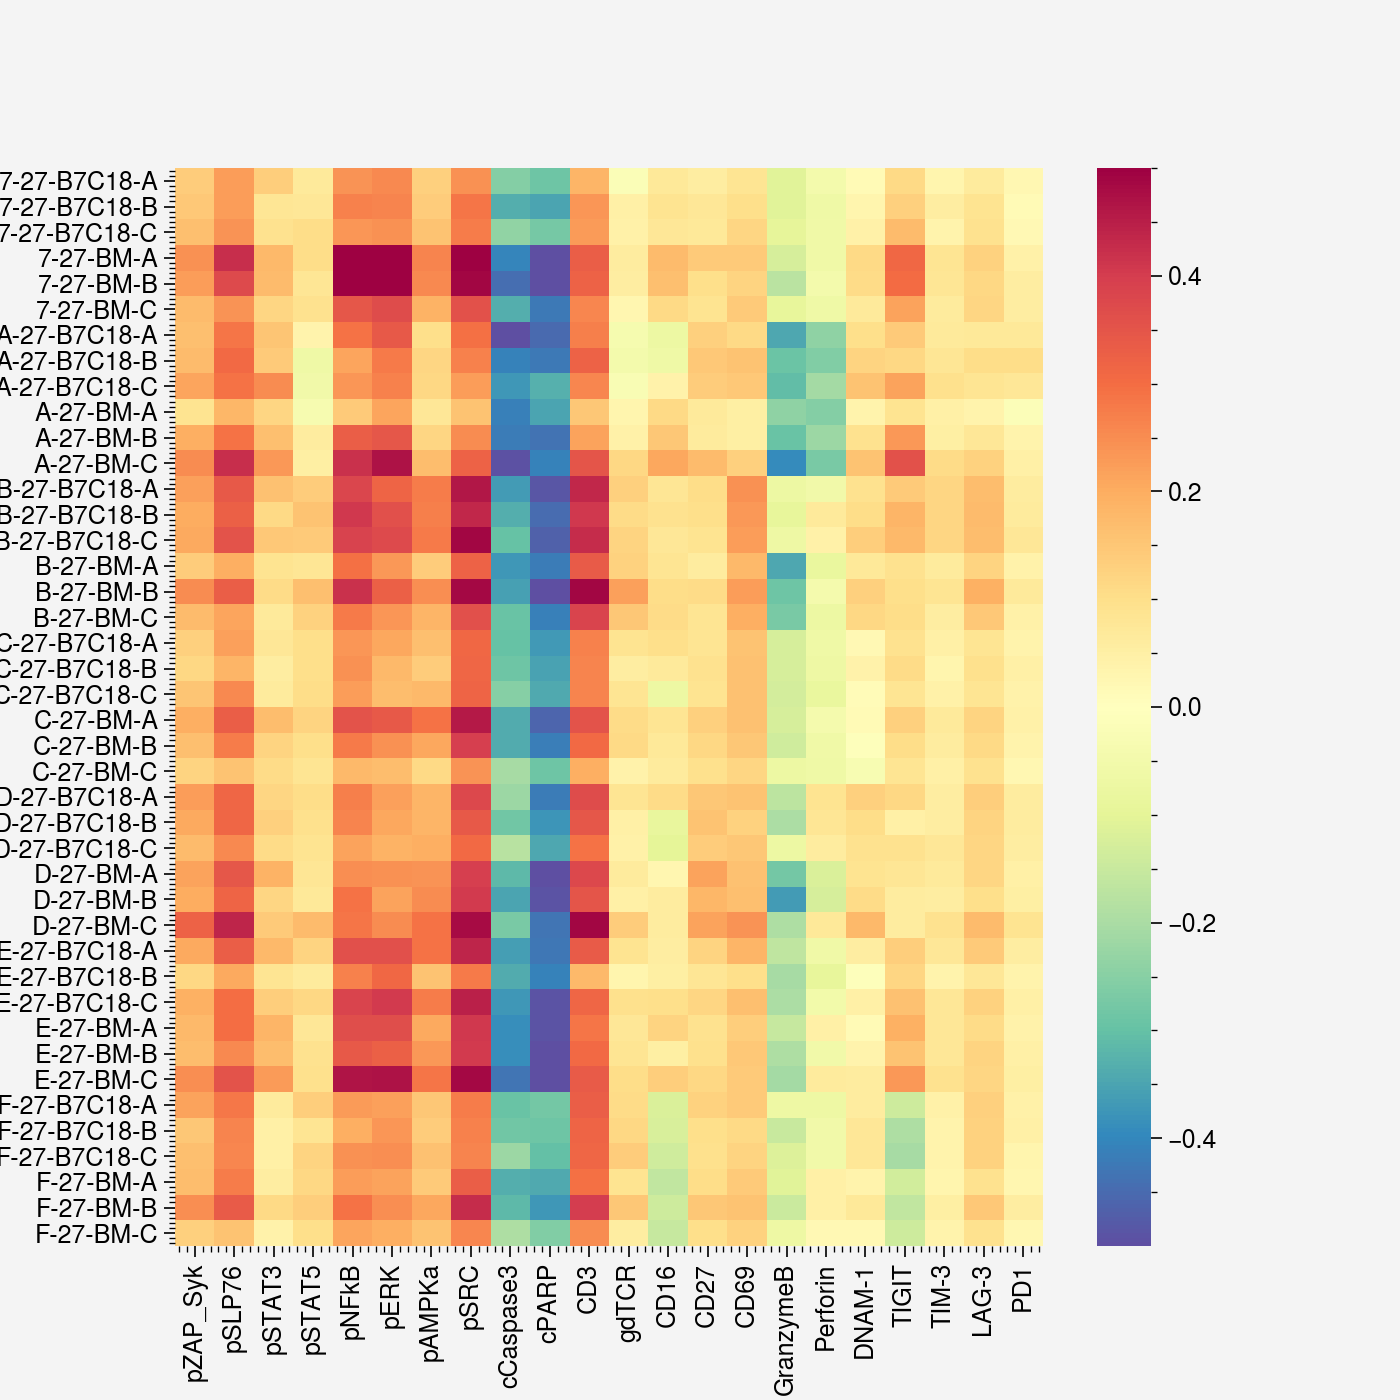

In [ ]:
#Generation of heatmap Figure S3e
fig, ax = plt.subplots(figsize=(7, 7))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vmin=-0.5,vcenter=-0,vmax=0.5)
seaborn.heatmap(cocul_emds_heatmap, cmap=colormap, norm=offset,)

plt.show()

In [25]:
#Generation of xEMD Figure S3d

In [26]:
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.005065   
                                                                B         -0.003791   
                                                                C          0.004827   
                                      BM        Batch3 20220614 A         -0.009623   
                                                                B          0.008827   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.033969   
                                                                B          0.019481   
                                                                C         -0.032630   
                                      BM        Batch3 20220614 A         -0.062333   
                                                                B          0.025336   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.013304   
                                                                B          0.003503   
                                                                C         -0.011172   
                                      BM        Batch3 20220614 A         -0.008880   
                                                                B         -0.005054   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.004634   
                                                                B         -0.005119   
                                                                C          0.003112   
                                      BM        Batch3 20220614 A         -0.007516   
                                                                B         -0.003823   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.033355   
                                                                B          0.033058   
                                                                C         -0.017333   
                                      BM        Batch3 20220614 A         -0.018797   
                                                                B          0.019477   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.011878   
                                                                B          0.005624   
                                                                C          0.003848   
                                      BM        Batch3 20220614 A         -0.015617   
                                                                B          0.011044   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        NT           B7C18     Batch3 20220614 A           0.039190   
                                                                B          -0.036359   
                                                                C  

In [27]:
data['meanEMD'] = data.abs().mean(axis=1)
data.head()


pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.005065   
                                                                B         -0.003791   
                                                                C          0.004827   
                                      BM        Batch3 20220614 A         -0.009623   
                                                                B          0.008827   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.033969   
                                                                B          0.019481   
                                                                C         -0.032630   
                                      BM        Batch3 20220614 A         -0.062333   
                                                                B          0.025336   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.013304   
                                                                B          0.003503   
                                                                C         -0.011172   
                                      BM        Batch3 20220614 A         -0.008880   
                                                                B         -0.005054   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A          0.004634   
                                                                B         -0.005119   
                                                                C          0.003112   
                                      BM        Batch3 20220614 A         -0.007516   
                                                                B         -0.003823   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.033355   
                                                                B          0.033058   
                                                                C         -0.017333   
                                      BM        Batch3 20220614 A         -0.018797   
                                                                B          0.019477   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        NT           B7C18     Batch3 20220614 A         -0.011878   
                                                                B          0.005624   
                                                                C          0.003848   
                                      BM        Batch3 20220614 A         -0.015617   
                                                                B          0.011044   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        NT           B7C18     Batch3 20220614 A           0.039190   
                                                                B          -0.036359   
                                                                C  

In [28]:
sorted_df = data.sort_values(by="meanEMD", ascending=True)
sorted_df.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      C        NT           BM        Batch3 20220614 A          0.004966   
                7        NT           BM        Batch3 20220614 B          0.008827   
                E        NT           B7C18     Batch3 20220614 C          0.011424   
                                                                B         -0.006204   
                C        NT           BM        Batch3 20220614 C         -0.007460   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      C        NT           BM        Batch3 20220614 A          0.011226   
                7        NT           BM        Batch3 20220614 B          0.025336   
                E        NT           B7C18     Batch3 20220614 C          0.014579   
                                                                B         -0.024795   
                C        NT           BM        Batch3 20220614 C          0.018625   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      C        NT           BM        Batch3 20220614 A         -0.004716   
                7        NT           BM        Batch3 20220614 B         -0.005054   
                E        NT           B7C18     Batch3 20220614 C         -0.004795   
                                                                B          0.004811   
                C        NT           BM        Batch3 20220614 C          0.004149   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      C        NT           BM        Batch3 20220614 A         -0.004539   
                7        NT           BM        Batch3 20220614 B         -0.003823   
                E        NT           B7C18     Batch3 20220614 C         -0.003985   
                                                                B         -0.005621   
                C        NT           BM        Batch3 20220614 C         -0.005334   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      C        NT           BM        Batch3 20220614 A          0.019384   
                7        NT           BM        Batch3 20220614 B          0.019477   
                E        NT           B7C18     Batch3 20220614 C         -0.025248   
                                                                B          0.029812   
                C        NT           BM        Batch3 20220614 C         -0.031786   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      C        NT           BM        Batch3 20220614 A         -0.009839   
                7        NT           BM        Batch3 20220614 B          0.011044   
                E        NT           B7C18     Batch3 20220614 C         -0.003002   
                                                                B         -0.002340   
                C        NT           BM        Batch3 20220614 C          0.009843   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      C        NT           BM        Batch3 20220614 A           0.027451   
                7        NT           BM        Batch3 20220614 B           0.028041   
                E        NT           B7C18     Batch3 20220614 C  

In [29]:
filtered_df = sorted_df.filter(["meanEMD"]).reset_index()
filtered_df_mono = filtered_df.loc[(filtered_df['Culture'].isin(['gd']))]
filtered_df_cocul = filtered_df.loc[(filtered_df['Culture'].isin(['PDOgd']))]
filtered_df_mono.head()

,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate,meanEMD
0,X,gd,C,NT,BM,Batch3,20220614,A,0.017248
1,X,gd,7,NT,BM,Batch3,20220614,B,0.017753
2,X,gd,E,NT,B7C18,Batch3,20220614,C,0.018080
3,X,gd,E,NT,B7C18,Batch3,20220614,B,0.018573
4,X,gd,C,NT,BM,Batch3,20220614,C,0.019070


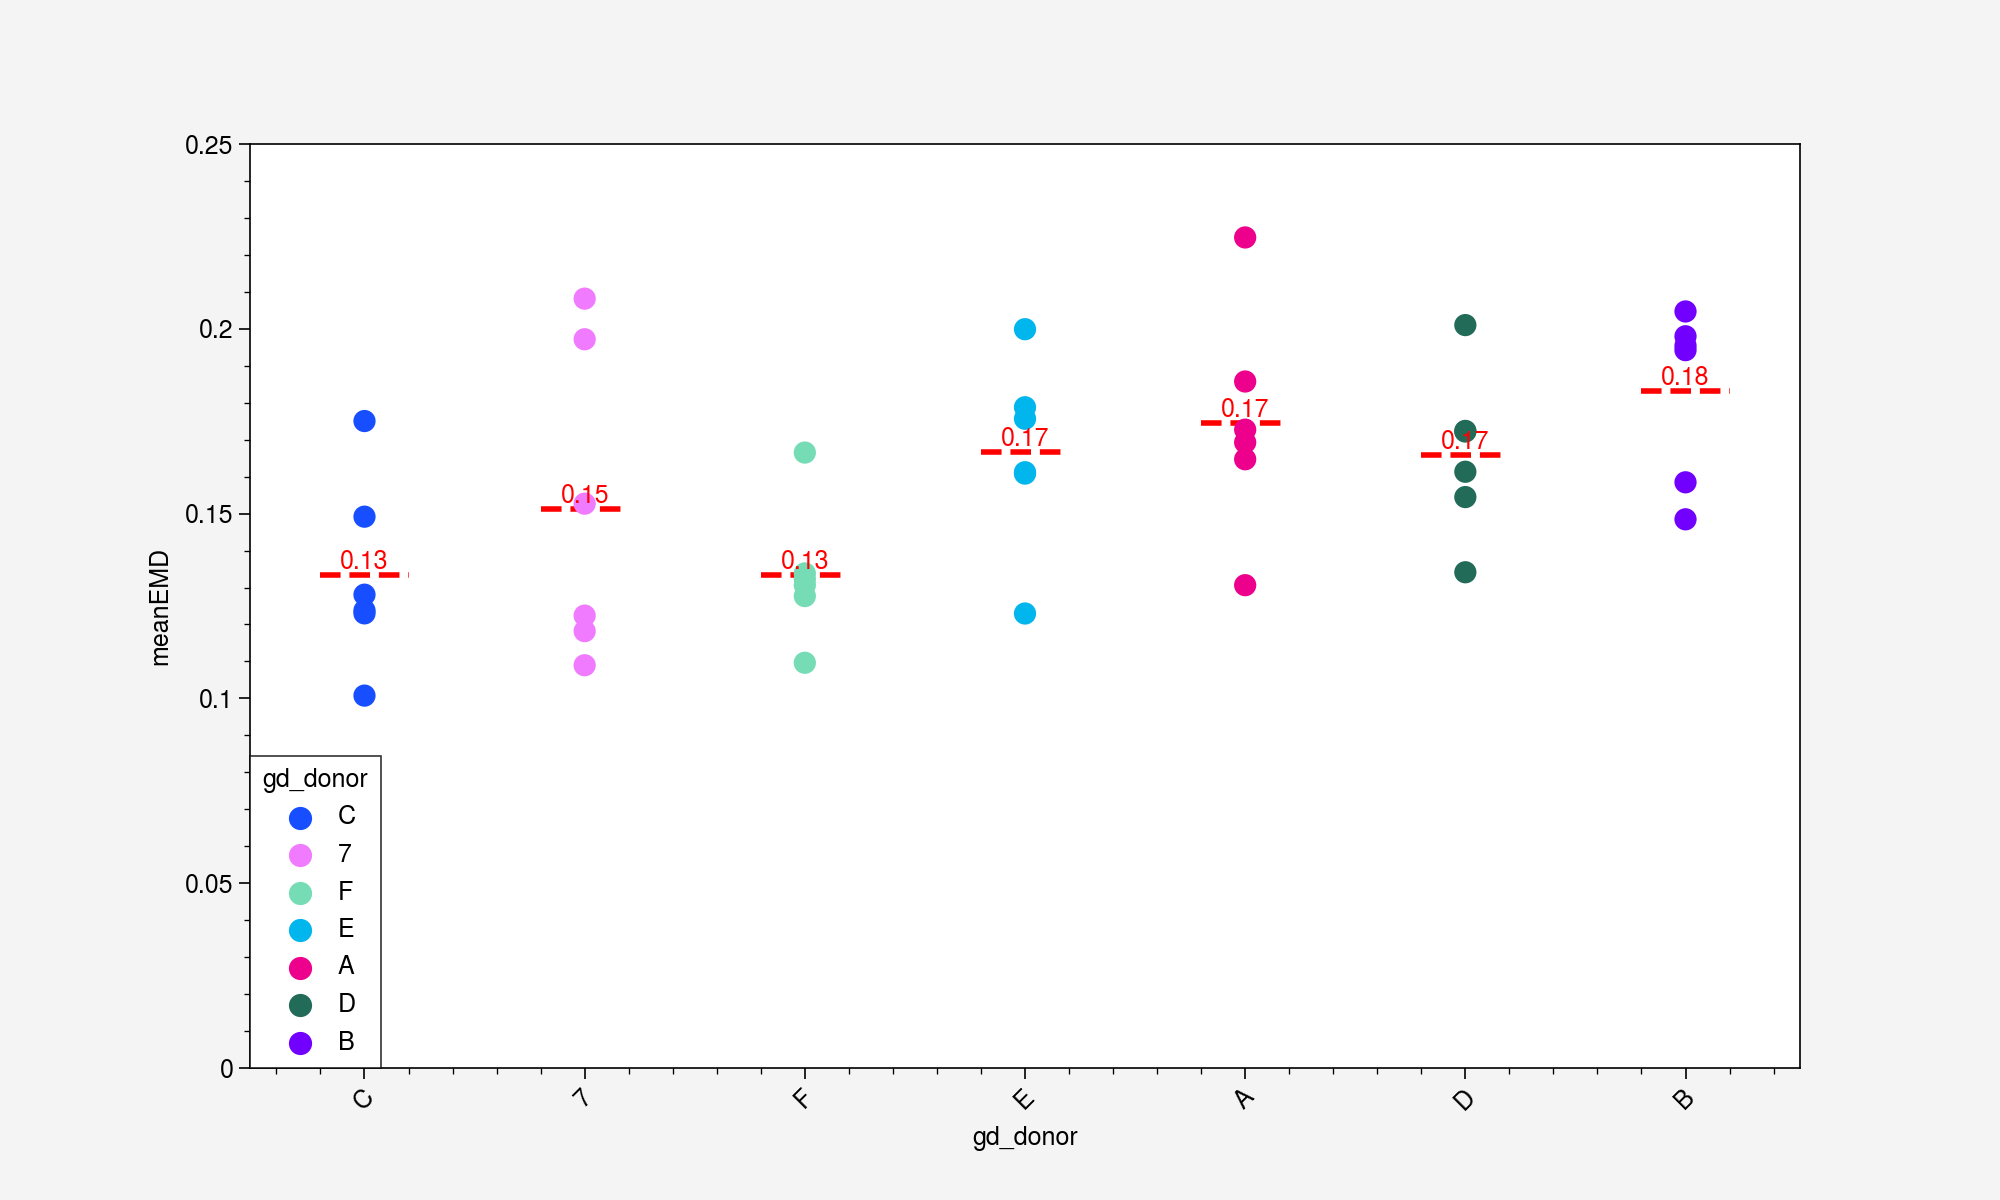

In [30]:
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}

treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=filtered_df_cocul,
    x="gd_donor",
    y="meanEMD",
    jitter=False, 
    size=8,
    hue="gd_donor",
    palette=donor  
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.25)

for donor_group in filtered_df_cocul['gd_donor'].unique():
    data_subset = filtered_df_cocul[filtered_df_cocul['gd_donor'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(filtered_df_cocul['gd_donor'].unique()).index(donor_group)
    y_coord = mean_value
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')

plt.show()

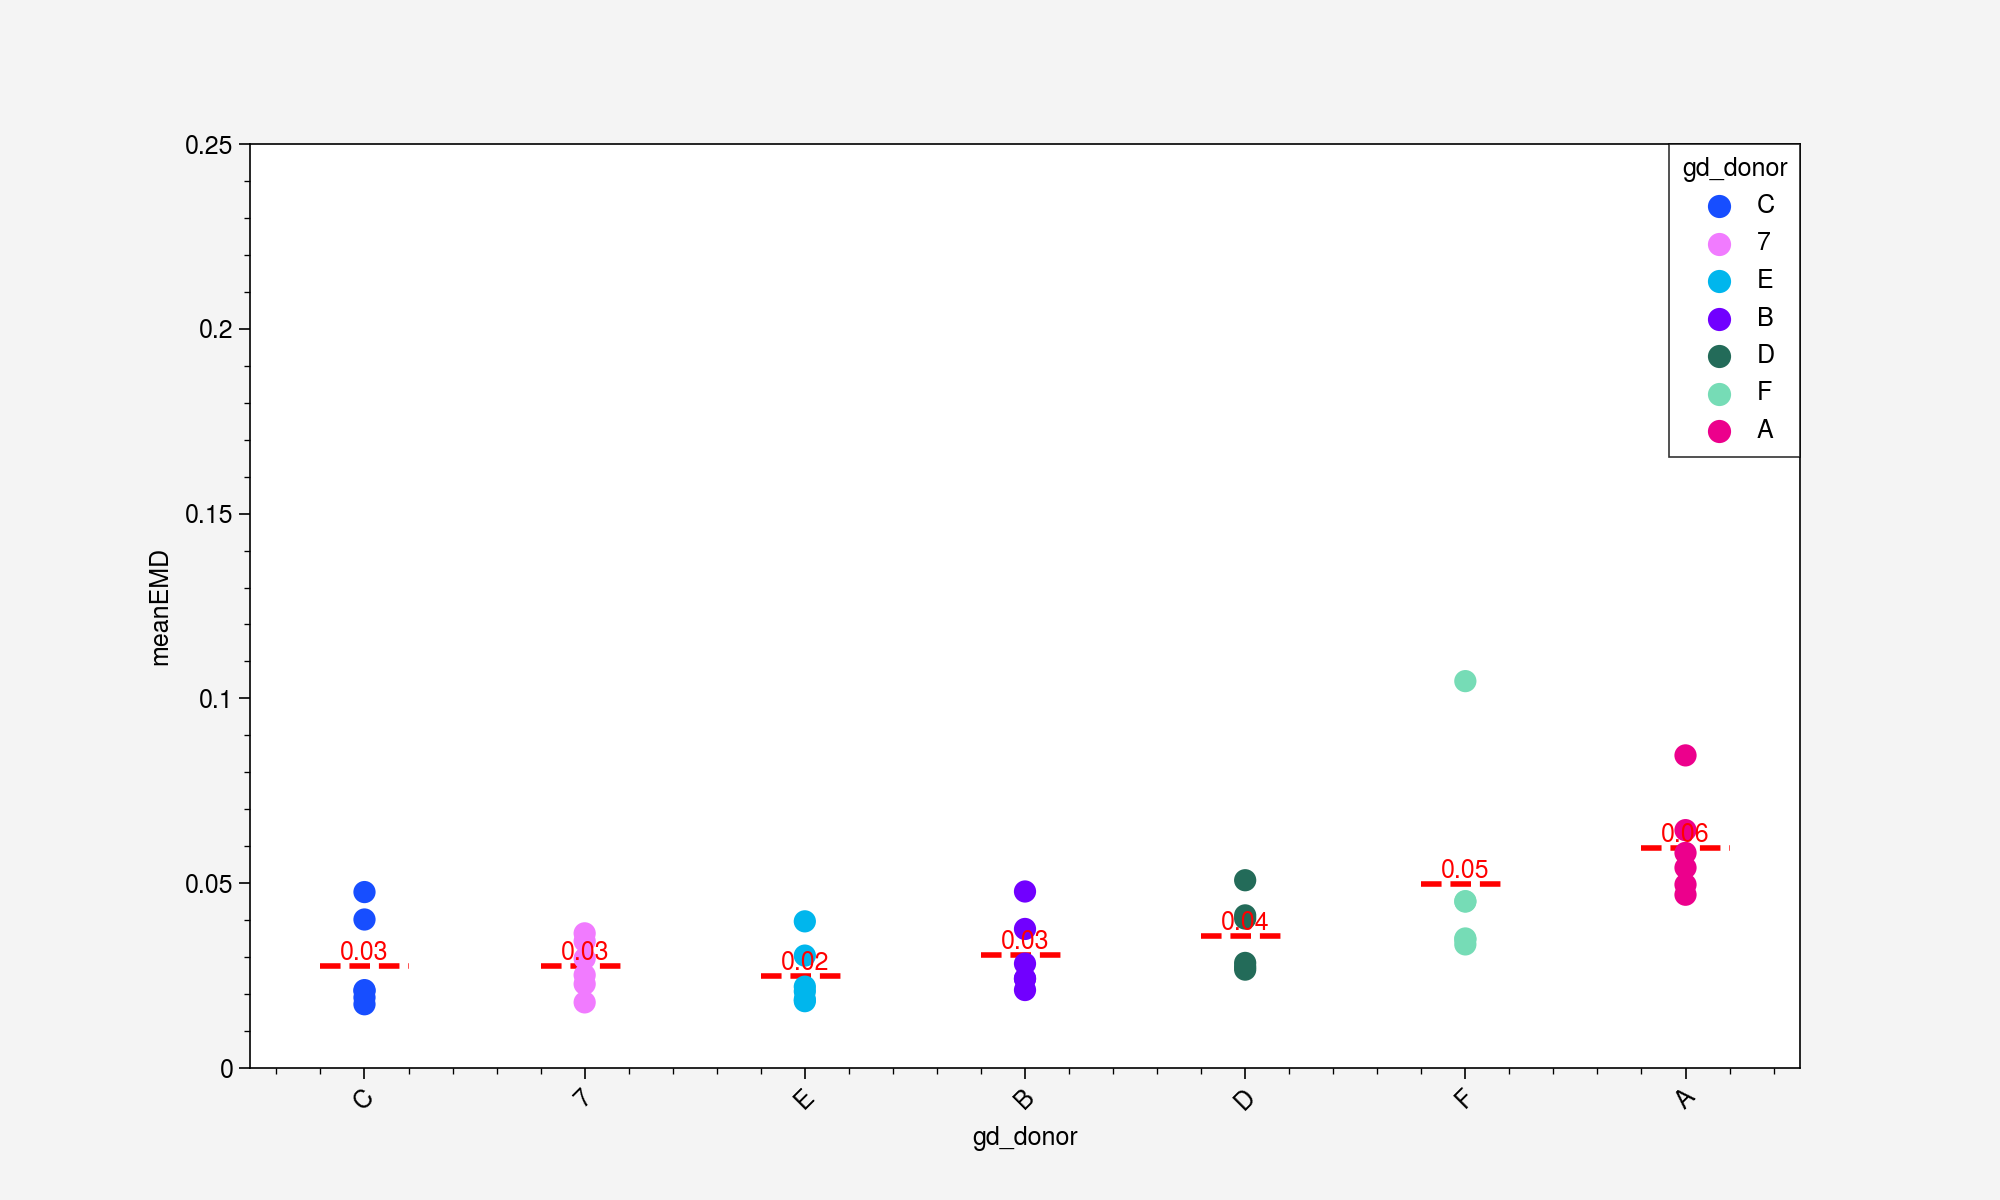

In [31]:
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}

treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=filtered_df_mono,
    x="gd_donor",
    y="meanEMD",
    jitter=False, 
    size=8,
    hue="gd_donor",
    palette=donor  
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.25)

for donor_group in filtered_df_mono['gd_donor'].unique():
    data_subset = filtered_df_mono[filtered_df_mono['gd_donor'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(filtered_df_mono['gd_donor'].unique()).index(donor_group)
    y_coord = mean_value
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')

plt.show()